In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN' ,"META", "NFLX", "CRM", "ORCL", "TSLA"]

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', "META", "NFLX", "CRM", "ORCL", "TSLA"]

end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN,META, NFLX, CRM, ORCL, TSLA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "META", "NETFLIX", "SALESFORCE", "ORACLE", "TESLA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-05-01  163.169998  163.279999  158.830002  161.830002  161.830002   
2023-05-02  161.880005  165.490005  158.929993  160.309998  160.309998   
2023-05-03  160.009995  165.000000  159.910004  160.610001  160.610001   
2023-05-04  162.710007  162.949997  159.649994  161.199997  161.199997   
2023-05-05  163.970001  170.789993  163.509995  170.059998  170.059998   
2023-05-08  173.720001  173.800003  169.190002  171.789993  171.789993   
2023-05-09  168.949997  169.820007  166.559998  169.149994  169.149994   
2023-05-10  172.550003  174.429993  166.679993  168.539993  168.539993   
2023-05-11  168.699997  173.570007  166.789993  172.080002  172.080002   
2023-05-12  176.070007  177.380005  167.229996  167.979996  167.979996   

               Volume company_name  
Date                                
2023-05-01  109015000        TESLA  
2023-05-02  128259700        TESLA  
2023-05-03  119728000        TESLA  
2023-05-04   95108500        TESLA  
2023-05-05  107440900        TESLA  
2023-05-08  112249400        TESLA  
2023-05-09   88965000        TESLA  
2023-05-10  119840700        TESLA  
2023-05-11  103889900        TESLA  
2023-05-12  157577100        TESLA

# Descriptive Statistics about the Data

In [2]:
# Summary Stats
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  754.000000  754.000000  754.000000  754.000000  754.000000   
mean   140.150663  141.876021  138.504048  140.266339  139.020135   
std     22.421761   22.634694   22.272226   22.474941   22.730634   
min     75.087502   76.974998   75.052498   76.927498   75.527557   
25%    126.507500  127.799997  125.027502  126.057501  124.651215   
50%    143.439995  145.320000  141.750000  143.409996  142.660820   
75%    155.077503  157.312500  153.447506  155.345005  154.969433   
max    182.630005  182.940002  179.119995  182.009995  180.434280   

             Volume  
count  7.540000e+02  
mean   9.749717e+07  
std    4.275282e+07  
min    3.519590e+07  
25%    7.036815e+07  
50%    8.733870e+07  
75%    1.123920e+08  
max    3.743368e+08

# Information About the Data

In [3]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2020-05-15 to 2023-05-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          754 non-null    float64
 1   High          754 non-null    float64
 2   Low           754 non-null    float64
 3   Close         754 non-null    float64
 4   Adj Close     754 non-null    float64
 5   Volume        754 non-null    int64  
 6   company_name  754 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 47.1+ KB


# Historical view of the closing price

In [4]:
import plotly.graph_objects as go
import plotly.subplots as sp

fig1 = sp.make_subplots(rows=3, cols=3, subplot_titles=[f"Closing Price of {company_name[i - 1]}" for i in range(1, 10)])

company_logo_colors = {
    'AAPL': '#b0b0b0', # Apple logo color
    'GOOG': '#4285F4', # Google logo color
    'MSFT': '#7CBB00', # Microsoft logo color
    'AMZN': '#FF9900', # Amazon logo color
    'META': '#3B5998', # Meta (Facebook) logo color
    'NFLX': '#E50914', # Netflix logo color
    'CRM': '#3297D3', # Salesforce logo color
    'ORCL': '#F80000', # Oracle logo color
    'TSLA': '#CC0000'  # Tesla logo color
}
colors = ['b', 'y', 'r', 'c', 'm', 'y', 'k', 'tab:orange', 'tab:purple']

for i, company in enumerate(company_list, 1):
    row = (i - 1) // 3 + 1
    col = (i - 1) % 3 + 1

    fig1.add_trace(
        go.Scatter(
            x=company.index,
            y=company['Close'],
            line=dict(color=company_logo_colors[tech_list[i - 1]]),
        ),
        row=row,
        col=col,
    )
    
    fig1.update_xaxes(title_text=None, range=['2020-03', '2023-03'], row=row, col=col)
    fig1.update_yaxes(title_text='Close', row=row, col=col)

fig1.update_layout(
    height=600,
    width=900,
    title_text="Closing Prices of Companies",
    showlegend=False,
)

fig1.show()


# Total volume of stock being traded each day

In [5]:
import plotly.graph_objects as go
import plotly.subplots as sp

fig2 = sp.make_subplots(rows=3, cols=3, subplot_titles=[f"Sales Volume for {company_name[i - 1]}" for i in range(1, 10)])

company_logo_colors = {
    'AAPL': '#b0b0b0', # Apple logo color
    'GOOG': '#4285F4', # Google logo color
    'MSFT': '#7CBB00', # Microsoft logo color
    'AMZN': '#FF9900', # Amazon logo color
    'META': '#3B5998', # Meta (Facebook) logo color
    'NFLX': '#E50914', # Netflix logo color
    'CRM': '#3297D3', # Salesforce logo color
    'ORCL': '#F80000', # Oracle logo color
    'TSLA': '#CC0000'  # Tesla logo color
}
colors = ['b', 'y', 'r', 'c', 'm', 'y', 'k', 'tab:orange', 'tab:purple']

max_volume = max([company['Volume'].max() for company in company_list])

for i, company in enumerate(company_list, 1):
    row = (i - 1) // 3 + 1
    col = (i - 1) % 3 + 1

    fig2.add_trace(
        go.Scatter(
            x=company.index,
            y=company['Volume'],
            name=company_name[i-1],
            line=dict(color=company_logo_colors[tech_list[i-1]]),
        ),
        row=row,
        col=col,
    )
    
    fig2.update_xaxes(title_text=None, range=['2020-03', '2023-03'], row=row, col=col)
    fig2.update_yaxes(title_text='Volume', row=row, col=col)

fig2.update_layout(
    height=600,
    width=900,
    title_text="Sales Volume for Companies",
    showlegend=False,
)

fig2.show()


# moving average of the various stocks

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig3 = make_subplots(rows=3, cols=3, subplot_titles=('APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'META', 'NETFLIX', 'SALESFORCE', 'ORACLE', 'TESLA'))

fig3.update_layout(height=600, width=800,
                      title_text="moving average of stocks",)

fig3.add_trace(go.Scatter(x=AAPL.index, y=AAPL['Adj Close'], name='Adj Close'), row=1, col=1)
fig3.add_trace(go.Scatter(x=AAPL.index, y=AAPL['MA for 10 days'], name='MA for 10 days'), row=1, col=1)
fig3.add_trace(go.Scatter(x=AAPL.index, y=AAPL['MA for 20 days'], name='MA for 20 days'), row=1, col=1)
fig3.add_trace(go.Scatter(x=AAPL.index, y=AAPL['MA for 50 days'], name='MA for 50 days'), row=1, col=1)

fig3.add_trace(go.Scatter(x=GOOG.index, y=GOOG['Adj Close'], name='Adj Close'), row=1, col=2)
fig3.add_trace(go.Scatter(x=GOOG.index, y=GOOG['MA for 10 days'], name='MA for 10 days'), row=1, col=2)
fig3.add_trace(go.Scatter(x=GOOG.index, y=GOOG['MA for 20 days'], name='MA for 20 days'), row=1, col=2)
fig3.add_trace(go.Scatter(x=GOOG.index, y=GOOG['MA for 50 days'], name='MA for 50 days'), row=1, col=2)

fig3.add_trace(go.Scatter(x=MSFT.index, y=MSFT['Adj Close'], name='Adj Close'), row=1, col=3)
fig3.add_trace(go.Scatter(x=MSFT.index, y=MSFT['MA for 10 days'], name='MA for 10 days'), row=1, col=3)
fig3.add_trace(go.Scatter(x=MSFT.index, y=MSFT['MA for 20 days'], name='MA for 20 days'), row=1, col=3)
fig3.add_trace(go.Scatter(x=MSFT.index, y=MSFT['MA for 50 days'], name='MA for 50 days'), row=1, col=3)

fig3.add_trace(go.Scatter(x=AMZN.index, y=AMZN['Adj Close'], name='Adj Close'), row=2, col=1)
fig3.add_trace(go.Scatter(x=AMZN.index, y=AMZN['MA for 10 days'], name='MA for 10 days'), row=2, col=1)
fig3.add_trace(go.Scatter(x=AMZN.index, y=AMZN['MA for 20 days'], name='MA for 20 days'), row=2, col=1)
fig3.add_trace(go.Scatter(x=AMZN.index, y=AMZN['MA for 50 days'], name='MA for 50 days'), row=2, col=1)


fig3.add_trace(go.Scatter(x=META.index, y=META['Adj Close'], name='Adj Close'), row=2, col=2)
fig3.add_trace(go.Scatter(x=META.index, y=META['MA for 10 days'], name='MA for 10 days'), row=2, col=2)
fig3.add_trace(go.Scatter(x=META.index, y=META['MA for 20 days'], name='MA for 20 days'), row=2, col=2)
fig3.add_trace(go.Scatter(x=META.index, y=META['MA for 50 days'], name='MA for 50 days'), row=2, col=2)

fig3.add_trace(go.Scatter(x=NFLX.index, y=NFLX['Adj Close'], name='Adj Close'), row=2, col=3)
fig3.add_trace(go.Scatter(x=NFLX.index, y=NFLX['MA for 10 days'], name='MA for 10 days'), row=2, col=3)
fig3.add_trace(go.Scatter(x=NFLX.index, y=NFLX['MA for 20 days'], name='MA for 20 days'), row=2, col=3)
fig3.add_trace(go.Scatter(x=NFLX.index, y=NFLX['MA for 50 days'], name='MA for 50 days'), row=2, col=3)

fig3.add_trace(go.Scatter(x=CRM.index, y=CRM['Adj Close'], name='Adj Close'), row=3, col=1)
fig3.add_trace(go.Scatter(x=CRM.index, y=CRM['MA for 10 days'], name='MA for 10 days'), row=3, col=1)
fig3.add_trace(go.Scatter(x=CRM.index, y=CRM['MA for 20 days'], name='MA for 20 days'), row=3, col=1)
fig3.add_trace(go.Scatter(x=CRM.index, y=CRM['MA for 50 days'], name='MA for 50 days'), row=3, col=1)

fig3.add_trace(go.Scatter(x=ORCL.index, y=ORCL['Adj Close'], name='Adj Close'), row=3, col=2)
fig3.add_trace(go.Scatter(x=ORCL.index, y=ORCL['MA for 10 days'], name='MA for 10 days'), row=3, col=2)
fig3.add_trace(go.Scatter(x=ORCL.index, y=ORCL['MA for 20 days'], name='MA for 20 days'), row=3, col=2)
fig3.add_trace(go.Scatter(x=ORCL.index, y=ORCL['MA for 50 days'], name='MA for 50 days'), row=3, col=2)

fig3.add_trace(go.Scatter(x=TSLA.index, y=TSLA['Adj Close'], name='Adj Close'), row=3, col=3)
fig3.add_trace(go.Scatter(x=TSLA.index, y=TSLA['MA for 10 days'], name='MA for 10 days'), row=3, col=3)
fig3.add_trace(go.Scatter(x=TSLA.index, y=TSLA['MA for 20 days'], name='MA for 20 days'), row=3, col=3)
fig3.add_trace(go.Scatter(x=TSLA.index, y=TSLA['MA for 50 days'], name='MA for 50 days'), row=3, col=3)

fig3.show()

# Daily return of the stock on average

In [7]:
import plotly.graph_objs as go

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig4 = make_subplots(rows=3, cols=3,
                    subplot_titles=("APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "META", "NETFLIX", "SALESFORCE", "ORACLE", "TESLA"),
                    horizontal_spacing=0.1, vertical_spacing=0.15)

fig4.update_layout(height=700, width=1000)

fig4.add_trace(go.Scatter(x=AAPL.index, y=AAPL['Daily Return'], mode='lines+markers', 
                         name='AAPL', line=dict(color=company_logo_colors['AAPL'])), row=1, col=1)

fig4.add_trace(go.Scatter(x=GOOG.index, y=GOOG['Daily Return'], mode='lines+markers',
                         name='GOOG', line=dict(color=company_logo_colors['GOOG'])), row=1, col=2)

fig4.add_trace(go.Scatter(x=MSFT.index, y=MSFT['Daily Return'], mode='lines+markers',
                         name='MSFT', line=dict(color=company_logo_colors['MSFT'])), row=1, col=3)

fig4.add_trace(go.Scatter(x=AMZN.index, y=AMZN['Daily Return'], mode='lines+markers',
                         name='AMZN', line=dict(color=company_logo_colors['AMZN'])), row=2, col=1)

fig4.add_trace(go.Scatter(x=META.index, y=META['Daily Return'], mode='lines+markers',
                         name='META', line=dict(color=company_logo_colors['META'])), row=2, col=2)

fig4.add_trace(go.Scatter(x=NFLX.index, y=NFLX['Daily Return'], mode='lines+markers',
                         name='NFLX', line=dict(color=company_logo_colors['NFLX'])), row=2, col=3)

fig4.add_trace(go.Scatter(x=CRM.index, y=CRM['Daily Return'], mode='lines+markers',
                         name='CRM', line=dict(color=company_logo_colors['CRM'])), row=3, col=1)

fig4.add_trace(go.Scatter(x=ORCL.index, y=ORCL['Daily Return'], mode='lines+markers',
                         name='ORCL', line=dict(color=company_logo_colors['ORCL'])), row=3, col=2)

fig4.add_trace(go.Scatter(x=TSLA.index, y=TSLA['Daily Return'], mode='lines+markers',
                         name='TSLA', line=dict(color=company_logo_colors['TSLA'])), row=3, col=3)

fig4.update_xaxes(title_text="Date")
fig4.update_yaxes(title_text="Daily Return Percentage")

fig4.update_layout(title_text="Daily Return Percentage of Top Tech Companies")

fig4.show()


# correlation between different stocks closing prices


In [8]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  9 of 9 completed


AAPL      AMZN       CRM      GOOG      META      MSFT  \
Date                                                                     
2020-05-15       NaN       NaN       NaN       NaN       NaN       NaN   
2020-05-18  0.023561  0.006839  0.006829  0.007828  0.010954  0.009555   
2020-05-19 -0.005778  0.009508  0.020522 -0.007555  0.017309 -0.006922   
2020-05-20  0.019448  0.019846  0.005056  0.024198  0.060356  0.013871   
2020-05-21 -0.007455 -0.020497 -0.009439 -0.002787  0.006175 -0.012011   

                NFLX      ORCL      TSLA  
Date                                      
2020-05-15       NaN       NaN       NaN  
2020-05-18 -0.003545  0.004346  0.018094  
2020-05-19 -0.003403 -0.015240 -0.006907  
2020-05-20 -0.007472  0.010700  0.009344  
2020-05-21 -0.025510 -0.012855  0.014763

# Comparing Tesla to itself

In [9]:
import plotly.graph_objects as go
import plotly.subplots as sp

fig5 = sp.make_subplots(rows=1, cols=1)

fig5.add_trace(go.Scatter(x=tech_rets['TSLA'], y=tech_rets['TSLA'], mode='markers', marker=dict(color='black')), row=1, col=1)

fig5.update_layout(height=600, width=800, title_text="Correlation of Tesla with Tesla", showlegend=False)

fig5.show()

In [10]:
import plotly.graph_objects as go

fig6 = go.Figure(data=go.Scatter(x=tech_rets['GOOG'], y=tech_rets['MSFT'], mode='markers'))

fig6.update_layout(
    title='Comparison of Daily Returns: Google vs Microsoft',
    xaxis_title='GOOG',
    yaxis_title='MSFT'
)

fig6.show()

# Visual analysis of all the companies (comparisons)

In [11]:
import plotly.express as px

fig7 = px.scatter_matrix(tech_rets, title='Pairplot of Tech Stocks Returns', dimensions=tech_rets.columns,
                        color_continuous_scale='RdBu', opacity=0.7, height=1000)
fig7.show()


In [12]:
fig_heatmap_rets = go.Figure(go.Heatmap(z=tech_rets.corr().values, x=tech_rets.corr().columns, y=tech_rets.corr().index, colorscale='Viridis'))
fig_heatmap_rets.update_layout(title='Correlation of stock return')

In [13]:
fig_heatmap_closing = go.Figure(go.Heatmap(z=closing_df.corr().values, x=closing_df.corr().columns, y=closing_df.corr().index, colorscale='Viridis'))
fig_heatmap_closing.update_layout(title='Correlation of stock closing price')

In [14]:
import plotly.graph_objects as go

rets = tech_rets.dropna()

area = np.pi * 5

fig8 = go.Figure()
fig8.add_trace(go.Scatter(x=rets.mean(), y=rets.std(), mode='markers', marker=dict(size=area)))
fig8.update_layout(
    xaxis_title='Expected return',
    yaxis_title='Risk',
    title='Value at risk by investing of each stock'
)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    fig8.add_annotation(
        x=x,
        y=y,
        text=label,
        showarrow=True,
        arrowhead=7,
        ax=50,
        ay=50,
        xanchor="left",
        yanchor="bottom",
        font=dict(color="blue"),
    )

fig8.show()


# Prediction using LSTM

In [15]:
# Get the stock quote
df = pdr.get_data_yahoo('META', start='2020-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  206.750000  209.789993  206.270004  209.779999  209.779999   
2020-01-03  207.210007  210.399994  206.949997  208.669998  208.669998   
2020-01-06  206.699997  212.779999  206.520004  212.600006  212.600006   
2020-01-07  212.820007  214.580002  211.750000  213.059998  213.059998   
2020-01-08  213.000000  216.240005  212.610001  215.220001  215.220001   
...                ...         ...         ...         ...         ...   
2023-05-08  231.419998  235.619995  230.270004  233.270004  233.270004   
2023-05-09  231.460007  235.880005  231.080002  233.369995  233.369995   
2023-05-10  236.169998  236.750000  230.720001  233.080002  233.080002   
2023-05-11  233.050003  238.210007  232.300003  235.789993  235.789993   
2023-05-12  236.740005  236.960007  231.449997  233.809998  233.809998   

              Volume  
Date                  
2020-01-02  12077100  
2020-01-03  11188400  
2020-01-06  17058900  
2020-01-07  14912400  
2020-01-08  13475000  
...              ...  
2023-05-08  16400500  
2023-05-09  16865600  
2023-05-10  19119000  
2023-05-11  20449000  
2023-05-12  16155300  

[847 rows x 6 columns]

In [16]:
import plotly.graph_objects as go

fig9 = go.Figure()
fig9.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines'))

fig9.update_layout(
    title='Close Price History',
    xaxis_title='Date',
    yaxis_title='Close Price USD ($)',
    width=800,
    height=400
)

fig9.show()

In [17]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

805

In [18]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.4121458 ],
       [0.40836089],
       [0.42176154],
       [0.42333003],
       [0.43069527],
       [0.44119755],
       [0.44037917],
       [0.45350702],
       [0.443789  ],
       [0.45091552],
       [0.45302965],
       [0.45429127],
       [0.4519044 ],
       [0.45149524],
       [0.44617586],
       [0.43997001],
       [0.42950181],
       [0.4394585 ],
       [0.45800797],
       [0.41129335],
       [0.38531048],
       [0.39308488],
       [0.4123163 ],
       [0.41327105],
       [0.41579434],
       [0.42084087],
       [0.42333003],
       [0.40331436],
       [0.41548742],
       [0.42360282],
       [0.42714902],
       [0.43949263],
       [0.43843559],
       [0.42851298],
       [0.41350971],
       [0.38125278],
       [0.36778397],
       [0.36925017],
       [0.34384697],
       [0.3531217 ],
       [0.36665872],
       [0.33068503],
       [0.3507007 ],
       [0.32822995],
       [0.31431785],
       [0.27479797],
       [0.30442937],
       [0.277

In [19]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.4121458 , 0.40836089, 0.42176154, 0.42333003, 0.43069527,
       0.44119755, 0.44037917, 0.45350702, 0.443789  , 0.45091552,
       0.45302965, 0.45429127, 0.4519044 , 0.45149524, 0.44617586,
       0.43997001, 0.42950181, 0.4394585 , 0.45800797, 0.41129335,
       0.38531048, 0.39308488, 0.4123163 , 0.41327105, 0.41579434,
       0.42084087, 0.42333003, 0.40331436, 0.41548742, 0.42360282,
       0.42714902, 0.43949263, 0.43843559, 0.42851298, 0.41350971,
       0.38125278, 0.36778397, 0.36925017, 0.34384697, 0.3531217 ,
       0.36665872, 0.33068503, 0.3507007 , 0.32822995, 0.31431785,
       0.27479797, 0.30442937, 0.27732126, 0.22354827, 0.27745763,
       0.1947011 , 0.20632863, 0.19794048, 0.21897911, 0.20738567,
       0.20182768, 0.24574622, 0.22948138, 0.25379342, 0.23145904])]
[0.2626930684085145]

[array([0.4121458 , 0.40836089, 0.42176154, 0.42333003, 0.43069527,
       0.44119755, 0.44037917, 0.45350702, 0.443789  , 0.45091552,
       0.45302965, 0.45429127, 0.451

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

745/745 [==============================] - 30s 32ms/step - loss: 0.0039


In [21]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 23ms/step


14.698682787771682

C:\Users\ndabe\AppData\Local\Temp\ipykernel_5700\2388977846.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



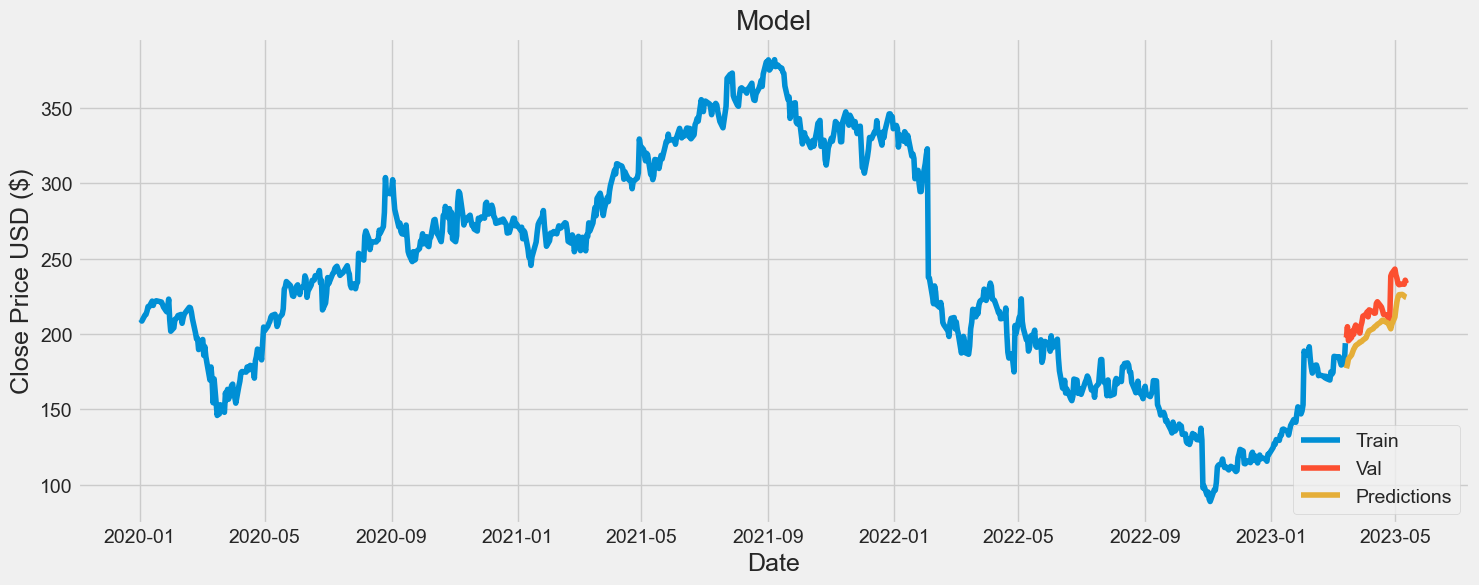

In [22]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [23]:
import plotly.graph_objects as go

# Create a trace for the training data
train_trace = go.Scatter(
    x=train.index,
    y=train['Close'],
    mode='lines',
    name='Train'
)

# Create a trace for the validation data
valid_trace = go.Scatter(
    x=valid.index,
    y=valid['Close'],
    mode='lines',
    name='Val'
)

# Create a trace for the predicted data
predictions_trace = go.Scatter(
    x=valid.index,
    y=valid['Predictions'],
    mode='lines',
    name='Predictions'
)

# Create the data list with all traces
data = [train_trace, valid_trace, predictions_trace]

# Create the layout for the figure
layout = go.Layout(
    title='Future prediction Model for META company using LSTM',
    xaxis=dict(title='Date', showgrid=False),
    yaxis=dict(title='Close Price USD ($)', showgrid=False),
    legend=dict(orientation='h', x=0, y=1.05),
    template='plotly_white'
)

# Create the figure object
predict_graph = go.Figure(data=data, layout=layout)

# Display the figure
predict_graph.show()


In [24]:
# Show the valid and predicted prices
valid

Close  Predictions
Date                               
2023-03-15  197.750000   177.333344
2023-03-16  204.929993   179.846161
2023-03-17  195.610001   183.566254
2023-03-20  197.809998   186.127579
2023-03-21  202.160004   188.036591
2023-03-22  199.809998   189.896210
2023-03-23  204.279999   191.129059
2023-03-24  206.009995   192.471893
2023-03-27  202.839996   193.899185
2023-03-28  200.679993   194.737122
2023-03-29  205.350006   194.870804
2023-03-30  207.839996   195.258179
2023-03-31  211.940002   196.044647
2023-04-03  213.070007   197.485489
2023-04-04  214.720001   199.209625
2023-04-05  211.479996   201.063416
2023-04-06  216.100006   202.271530
2023-04-10  214.750000   203.615387
2023-04-11  213.850006   204.627640
2023-04-12  214.000000   205.207733
2023-04-13  220.350006   205.503784
2023-04-14  221.490005   206.480087
2023-04-17  218.860001   207.800919
2023-04-18  217.889999   208.753647
2023-04-19  215.699997   209.260712
2023-04-20  213.070007   209.164139
2023-04-21  212.889999   208.416016
2023-04-24  212.789993   207.424545
2023-04-25  207.550003   206.436722
2023-04-26  209.399994   204.880951
2023-04-27  238.559998   203.537125
2023-04-28  240.320007   206.486771
2023-05-01  243.179993   211.384766
2023-05-02  239.240005   217.017822
2023-05-03  237.029999   221.648422
2023-05-04  233.520004   224.779282
2023-05-05  232.779999   226.173447
2023-05-08  233.270004   226.365417
2023-05-09  233.369995   225.968689
2023-05-10  233.080002   225.333939
2023-05-11  235.789993   224.632965
2023-05-12  233.809998   224.388855

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define layout
app.layout = html.Div([
    dbc.Row([
        dbc.Col(dcc.Graph(figure=fig1), width=12),
    ]),
     dbc.Row([
        dbc.Col(dcc.Graph(figure=fig2), width=12),
    ]),
     dbc.Row([
         dbc.Col(dcc.Graph(figure=fig3), width=12),
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(figure=fig4), width=6),
         dbc.Col(dcc.Graph(figure=fig7), width=6),
    ]),
     dbc.Row([
          dbc.Col(dcc.Graph(figure=fig5), width=12),
    ]),
     dbc.Row([
         dbc.Col(dcc.Graph(figure=fig6), width=12),
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(figure=fig_heatmap_rets), width=6),
        dbc.Col(dcc.Graph(figure=fig_heatmap_closing), width=6),
    ]),
    dbc.Row([
       
        dbc.Col(dcc.Graph(figure=fig8), width=6),
          dbc.Col(dcc.Graph(figure=fig9), width=6),
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(figure=predict_graph), width=12),
    ]),
])

if __name__ == '__main__':
    app.run_server(port=8051)

C:\Users\ndabe\AppData\Local\Temp\ipykernel_5700\3735544623.py:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

C:\Users\ndabe\AppData\Local\Temp\ipykernel_5700\3735544623.py:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



Dash is running on http://127.0.0.1:8051/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8051/ (Press CTRL+C to quit)
127.0.0.1 - - [15/May/2023 09:56:54] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/May/2023 09:56:55] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [15/May/2023 09:56:56] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [15/May/2023 09:56:56] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [15/May/2023 09:56:56] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
